<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/commercial_bank_plc_Close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import files



drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
price_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SP_SL_20_dataset_final.csv')
price_df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
0,1/31/2025,120.75,121.5,119.00,119.50,523,1016885,122167426.0,SAMPATH BANK PLC,NaN
1,1/30/2025,119.75,120.5,118.75,120.00,587,1279402,152615285.3,SAMPATH BANK PLC,NaN
2,1/29/2025,122.00,122.0,118.50,119.25,1354,2563188,307574122.8,SAMPATH BANK PLC,NaN
3,1/28/2025,122.00,122.5,121.00,121.25,838,990361,120261351.3,SAMPATH BANK PLC,NaN
4,1/27/2025,122.00,123.0,121.50,122.00,694,895710,109462379.0,SAMPATH BANK PLC,NaN


In [ ]:
cboc_plc_price_df = price_df[price_df['Company Name'] == "COMMERCIAL BANK OF CEYLON PLC"]

In [ ]:
cboc_plc_price_df['Trade Date'] = pd.to_datetime(cboc_plc_price_df['Trade Date']).dt.date

/tmp/ipython-input-4-2861721033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cboc_plc_price_df['Trade Date'] = pd.to_datetime(cboc_plc_price_df['Trade Date']).dt.date


In [ ]:
cboc_plc_price_df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
12991,2025-01-31,128.75,130.00,127.0,128.00,229,248590,31938872.25,COMMERCIAL BANK OF CEYLON PLC,NaN
12992,2025-01-30,129.75,130.00,127.5,127.75,160,162095,20960744.00,COMMERCIAL BANK OF CEYLON PLC,NaN
12993,2025-01-29,129.50,130.00,128.0,128.25,152,99200,12752266.00,COMMERCIAL BANK OF CEYLON PLC,NaN
12994,2025-01-28,129.75,130.00,127.5,128.75,101,133091,17232269.75,COMMERCIAL BANK OF CEYLON PLC,NaN
12995,2025-01-27,129.75,129.75,128.0,128.75,189,243510,31465752.25,COMMERCIAL BANK OF CEYLON PLC,NaN
...,...,...,...,...,...,...,...,...,...,...
14169,2020-01-08,81.40,81.70,80.0,81.50,55,14615,1180192.50,COMMERCIAL BANK OF CEYLON PLC,NaN
14170,2020-01-07,82.60,82.70,82.0,82.00,29,14544,1193646.40,COMMERCIAL BANK OF CEYLON PLC,NaN
14171,2020-01-06,83.00,83.10,82.6,82.80,23,9881,820043.00,COMMERCIAL BANK OF CEYLON PLC,NaN
14172,2020-01-03,86.00,86.00,83.0,83.10,48,26617,2210089.40,COMMERCIAL BANK OF CEYLON PLC,NaN


In [ ]:
import matplotlib.pyplot as plt

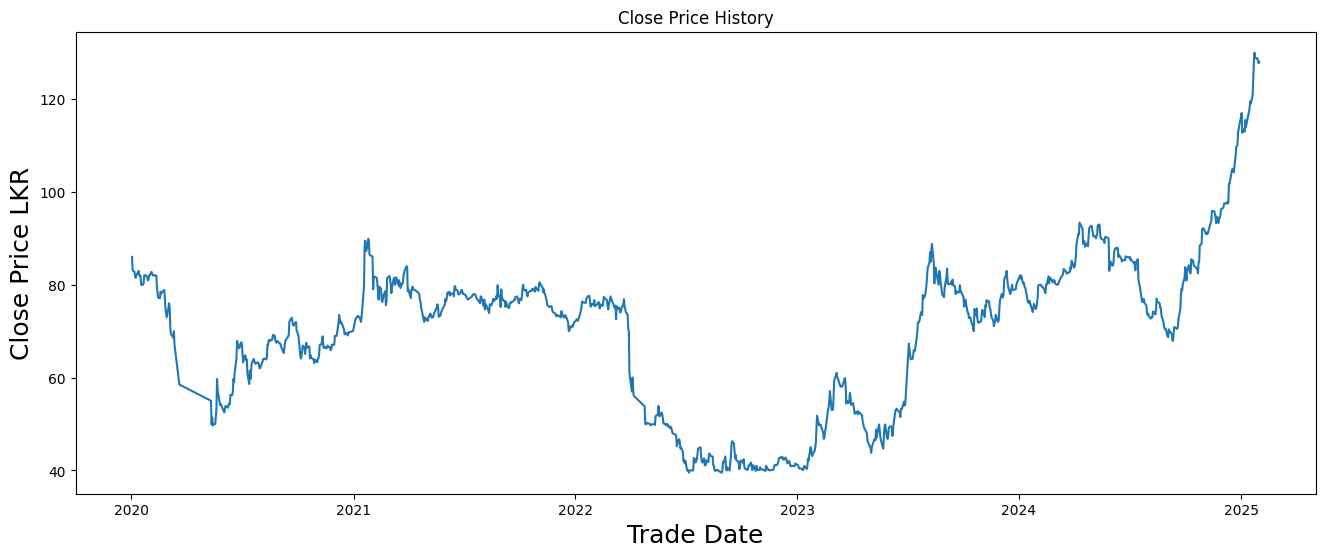

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(cboc_plc_price_df['Trade Date'],cboc_plc_price_df['Close (Rs.)'])
plt.xlabel('Trade Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = cboc_plc_price_df.filter(['Close (Rs.)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1124

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.97790055],
       [0.97513812],
       [0.98066298],
       ...,
       [0.47845304],
       [0.48176796],
       [0.51381215]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.97790055, 0.97513812, 0.98066298, 0.98618785, 0.98618785,
       0.98895028, 1.        , 0.97513812, 0.93370166, 0.89779006,
       0.87845304, 0.8839779 , 0.86740331, 0.83149171, 0.82320442,
       0.83977901, 0.8121547 , 0.81767956, 0.80939227, 0.85635359,
       0.83977901, 0.83425414, 0.80939227, 0.77900552, 0.77624309,
       0.75414365, 0.71546961, 0.71823204, 0.72375691, 0.71823204,
       0.71270718, 0.6878453 , 0.6878453 , 0.6441989 , 0.64088398,
       0.6441989 , 0.64088398, 0.64088398, 0.64088398, 0.6320442 ,
       0.62983425, 0.62762431, 0.6121547 , 0.60773481, 0.60773481,
       0.59447514, 0.60994475, 0.59447514, 0.60773481, 0.61436464,
       0.62209945, 0.62320442, 0.59889503, 0.59558011, 0.59005525,
       0.57458564, 0.56906077, 0.57127072, 0.5679558 , 0.56906077])]
[np.float64(0.5801104972375691)]

[array([0.97790055, 0.97513812, 0.98066298, 0.98618785, 0.98618785,
       0.98895028, 1.        , 0.97513812, 0.93370166, 0.89779006,
       0.87845304, 0.883

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# # Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 64s 53ms/step - loss: 0.0022
Epoch 2/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - loss: 6.8637e-04
Epoch 3/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - loss: 4.6115e-04
Epoch 4/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - loss: 3.7668e-04
Epoch 5/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - loss: 3.9631e-04
Epoch 6/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - loss: 4.2852e-04
Epoch 7/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - loss: 4.0904e-04
Epoch 8/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 54s 51ms/step - loss: 3.8603e-04
Epoch 9/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - loss: 4.1092e-04
Epoch 10/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - loss: 4.6915e-04
Epoch 11/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - loss: 3.5112e-04
Epoch 12/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - loss: 3.6034e-04
Epoch 13/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - loss: 3.6662e-04
Epoch 14/20
1064/1064 ━━━

In [ ]:
model.save('/content/drive/My Drive/FYP/commercial_bank_plc_lstm_model.h5')

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 445ms/step


np.float64(2.237204532535554)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.9594721508551095


/tmp/ipython-input-16-1041969288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


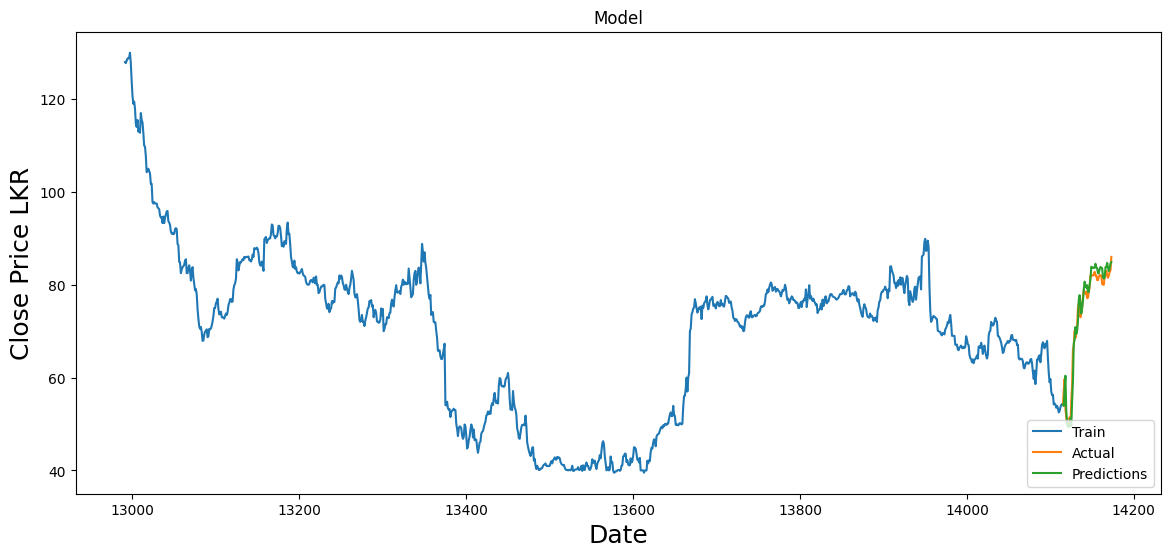

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()